In [44]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="5"

import tensorflow as tf
print(tf.__version__)

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
config.gpu_options.per_process_gpu_memory_fraction = 0.33

1.5.0


In [45]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [46]:
tf.set_random_seed(4286)

In [47]:
mnist.train.num_examples

55000

In [48]:
mnist.test.num_examples

10000

In [49]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
mnist.train.images[1].shape

(784,)

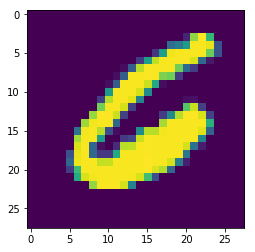

In [51]:
plt.imshow(mnist.train.images[48949].reshape(28,28))

In [52]:
# Creating the Place Holders

X = tf.placeholder(tf.float32, shape = [None, 784])

Y_true = tf.placeholder(tf.float32, shape = [None, 10])

In [53]:
# Defining the Hidden Layers

HL1 = 1024

HL2 = 1024

HL3 = 1024

HL4 = 1024

HL5 = 1024

OL = 10

In [54]:
# Defining the weights and bias for the five layers

W1 = tf.Variable(tf.truncated_normal([784, HL1], stddev=0.1))
b1 = tf.Variable(tf.zeros([HL1]))

W2 = tf.Variable(tf.truncated_normal([HL1, HL2], stddev=0.1))
b2 = tf.Variable(tf.zeros([HL2]))

W3 = tf.Variable(tf.truncated_normal([HL2, HL3], stddev=0.1))
b3 = tf.Variable(tf.zeros([HL3]))

W4 = tf.Variable(tf.truncated_normal([HL3, HL4], stddev=0.1))
b4 = tf.Variable(tf.zeros([HL4]))

W5 = tf.Variable(tf.truncated_normal([HL4, HL5], stddev=0.1))
b5 = tf.Variable(tf.zeros([HL5]))

W6 = tf.Variable(tf.truncated_normal([HL5, OL], stddev=0.1))
b6 = tf.Variable(tf.zeros([OL]))

In [55]:
# Defining the activation function for each layer

L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

L3 = tf.nn.relu(tf.matmul(L2, W3) + b3)

L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)

L5 = tf.nn.relu(tf.matmul(L4, W5) + b5)

Y_logits = tf.matmul(L5, W6) + b6

Y_pred = tf.nn.softmax(Y_logits)

In [56]:
# Defining the Loss Function

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = Y_logits, labels = Y_true))

In [57]:
# Defining the optimizer function

optimizer = tf.train.AdamOptimizer(learning_rate = 0.001)
train = optimizer.minimize(cross_entropy)

In [58]:
# Calcualting accuracy of trained model

matches = tf.equal(tf.argmax(Y_pred, 1), tf.argmax(Y_true, 1))
accuracy = tf.reduce_mean(tf.cast(matches, tf.float32))

In [59]:
# Creating the Session

init = tf.global_variables_initializer()

In [60]:
epochs = 20000
train_loss = list()
train_acc = list()
test_loss = list()
test_acc = list()
predictions = list()

sess = tf.Session(config = config)
sess.run(init)
    
for i in range(epochs + 1):
    batch_X , batch_Y = mnist.train.next_batch(256)

    sess.run(train, feed_dict={X: batch_X, Y_true: batch_Y})

    if i%5000 == 0:
        acc_trn, loss_trn = sess.run([accuracy, cross_entropy], feed_dict={X: batch_X, Y_true: batch_Y})

        acc_tst, loss_tst = sess.run([accuracy, cross_entropy], feed_dict={X: mnist.test.images, Y_true: mnist.test.labels})

        print("Currently on Iteration # {}".format(i))
        print("Training Set Accuracy and Loss: Accuracy = {}, Loss = {}".format(acc_trn*100, loss_trn*100) )
        print("Test Set Accuracy and Loss: Accuracy = {}, Loss = {}".format(acc_tst*100, loss_tst*100))
        print("\n")

        train_loss.append(loss_trn)
        train_acc.append(acc_trn)
        test_loss.append(loss_tst)
        test_acc.append(acc_tst)
            

Currently on Iteration # 0
Training Set Accuracy and Loss: Accuracy = 30.859375, Loss = 3695.2682495117188
Test Set Accuracy and Loss: Accuracy = 23.77000004053116, Loss = 4441.907501220703


Currently on Iteration # 5000
Training Set Accuracy and Loss: Accuracy = 100.0, Loss = 0.11652898974716663
Test Set Accuracy and Loss: Accuracy = 97.86999821662903, Loss = 12.102773785591125


Currently on Iteration # 10000
Training Set Accuracy and Loss: Accuracy = 100.0, Loss = 0.09014913230203092
Test Set Accuracy and Loss: Accuracy = 97.97000288963318, Loss = 10.271655023097992


Currently on Iteration # 15000
Training Set Accuracy and Loss: Accuracy = 100.0, Loss = 0.02263514616061002
Test Set Accuracy and Loss: Accuracy = 97.93000221252441, Loss = 16.679243743419647


Currently on Iteration # 20000
Training Set Accuracy and Loss: Accuracy = 100.0, Loss = 0.00013866396102457657
Test Set Accuracy and Loss: Accuracy = 98.12999963760376, Loss = 14.717409014701843




# 1.3

In [63]:
test_images = mnist.test.images[:1000, ]
test_labels = mnist.test.labels[:1000, ]
predictions, acc = sess.run([Y_pred, accuracy], feed_dict={X: test_images, Y_true:  test_labels})

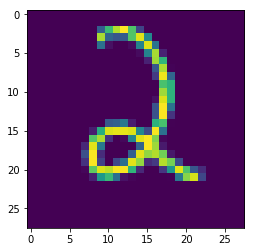

In [64]:
plt.imshow(test_images[47].reshape(28,28))

In [65]:
images = []
for i in range(1000):
    images.append(predictions[i,].argmax())

In [66]:
images_dict = dict()
for index, value in enumerate(images):
    if value in images_dict:
        images_dict[value].append(index)
    else:
        images_dict[value] = [index]

In [67]:
import collections
images_dict = collections.OrderedDict(sorted(images_dict.items()))

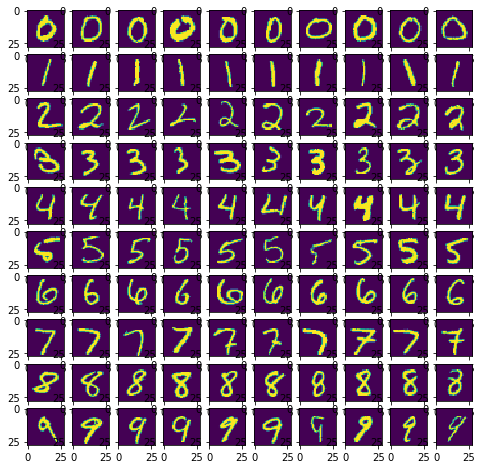

In [68]:
f, axes = plt.subplots(10, 10, figsize = (8, 8))
for i in range(10):
    for j in range(10):
        axes[i,j].imshow(test_images[images_dict[i][j]].reshape(28, 28))

# 1.4

In [69]:
predictions4 = sess.run(L5, feed_dict={X: test_images})

In [70]:
predictions4.shape

(1000, 1024)

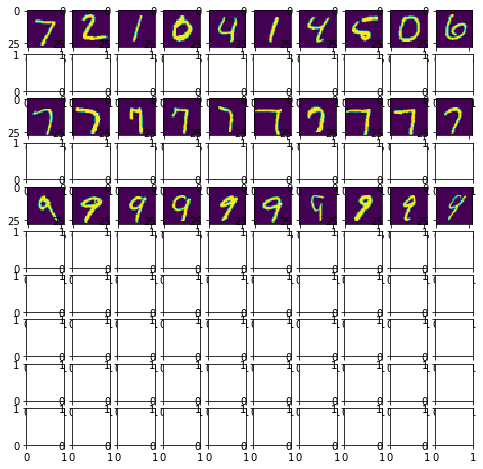

In [71]:
images4 = []
x = np.random.randint(1024, size = 10)
for i in range(1000):
    images4.append(predictions4[i, x].argmax())
    
images_dict4 = dict()
for index, value in enumerate(images4):
    if value in images_dict4:
        images_dict4[value].append(index)
    else:
        images_dict4[value] = [index]

images_dict4 = collections.OrderedDict(sorted(images_dict4.items()))

f, axes = plt.subplots(10, 10, figsize = (8, 8))
for i in range(10):    
    if i not in images_dict4:
        x = 0
    elif len(images_dict4[i][:]) >= 10:
        x = 10
    else:
        x = len(images_dict4[i][:])
    for j in range(x):
        axes[i, j].imshow(test_images[images_dict4[i][j]].reshape(28, 28))

In [72]:
print("The classified {}.\nSo there will be only {} rows of images.\n ".format(images_dict4.keys(), len(images_dict4.keys())))
for ix, v in enumerate(images_dict4.keys()):
    print("There are {} images classified as {} by the model which may not be {} originally.\n".format(len(images_dict4[v][:]), v, v))

The classified odict_keys([0, 2, 4]).
So there will be only 3 rows of images.
 
There are 883 images classified as 0 by the model which may not be 0 originally.

There are 22 images classified as 2 by the model which may not be 2 originally.

There are 95 images classified as 4 by the model which may not be 4 originally.



As it can be observed, the penultimate layer is not able to accurately classify the images when compared to the last layer. 

Classifying an image based on the penultimate layer is not appropriate since not a great number of concretely activated neurons could be found.

Since the neurons are still in an indecisive state of classification in the penultimate layer, most of the input images are wrongly classified and in most cases the model is classifying almsot all the images as a single value.

The ideal situation would be to have a very few number of dormant neurons i.e this implies that a significant number of images are activated.

# 1.5 & 1.6

In [73]:
def average(x):
    images_avg = dict()
    averages = []
    for index, value in enumerate(np.argmax(test_labels[:, ], axis = 1)):
        if value in images_avg:
            images_avg[value].append(index)
        else:
            images_avg[value] = [index]
    images_avg = collections.OrderedDict(sorted(images_avg.items()))   
    for key in images_avg:
        pc1 = pc2 = 0
        for v in images_avg[key]:
            pc1 += x[v][0]
            pc2 += x[v][1]
        pc1 /= len(images_avg[key])
        pc2 /= len(images_avg[key])
        averages.append([pc1,pc2])
    return averages

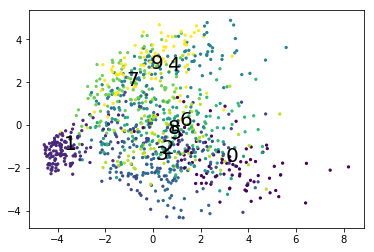

In [74]:
from sklearn.decomposition import PCA
coordinates = list()
pca = PCA(n_components = 2)
pca_images = pca.fit_transform(test_images)
coordinates = average(pca_images)
plt.scatter(pca_images[:, 0], pca_images[:, 1], c = np.argmax(test_labels[:, ], axis = 1),s =5)
for i in range(10):
    plt.annotate(i,coordinates[i],fontsize = 20)
plt.show() 

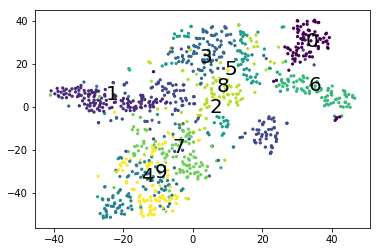

In [75]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2)
tsne_images = tsne.fit_transform(test_images)
coordinates = average(tsne_images)
plt.scatter(tsne_images[:, 0], tsne_images[:, 1], c = np.argmax(test_labels[:, ], axis = 1), s = 5)
for i in range(10):
    plt.annotate(i,coordinates[i],fontsize = 20)
plt.show()

In [76]:
images_HL = sess.run([L1, L2, L3, L4, L5, Y_pred], feed_dict={X: test_images, Y_true:  test_labels})

In [77]:
images_HL_pca = list()
images_HL_tsne = list()
for i in range(len(images_HL)):
    images_HL_pca.append(pca.fit_transform(images_HL[i]))
    images_HL_tsne.append(tsne.fit_transform(images_HL[i]))

In [78]:
images_HL_pca[2].shape

(1000, 2)

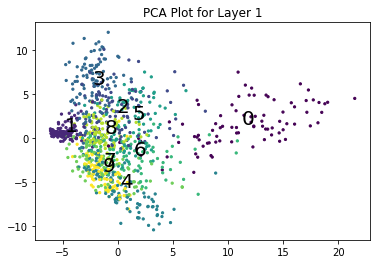

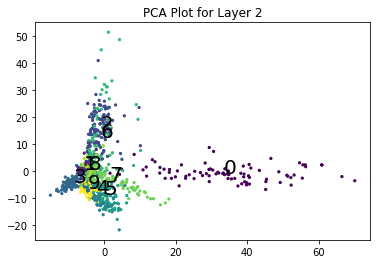

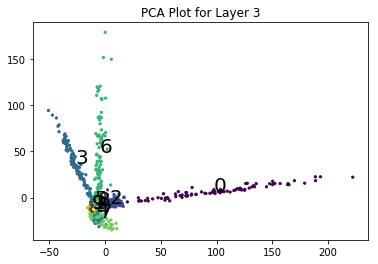

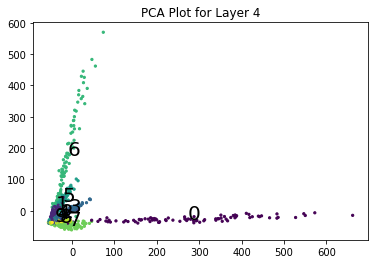

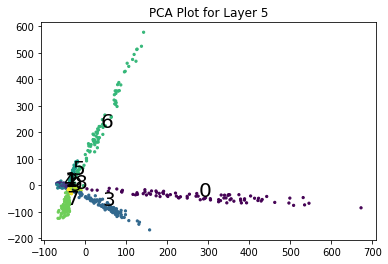

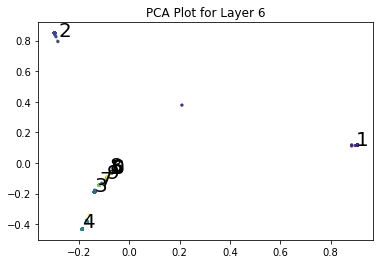

In [79]:
for i in range(len(images_HL_pca)):
    coordinates = average(images_HL_pca[i])
    plt.scatter(images_HL_pca[i][:, 0], images_HL_pca[i][:, 1], c = np.argmax(test_labels[:, ], axis = 1), s = 5)
    for j in range(10):
        plt.annotate(j,coordinates[j],fontsize = 20)
    plt.title("PCA Plot for Layer {}".format(i + 1))
    plt.show()

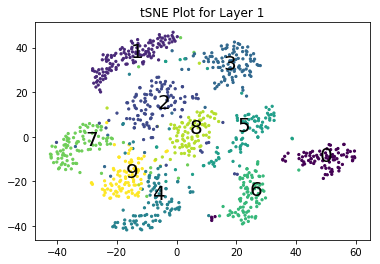

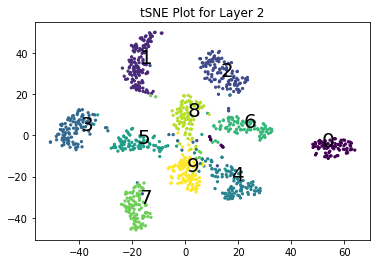

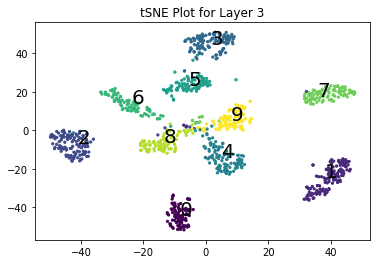

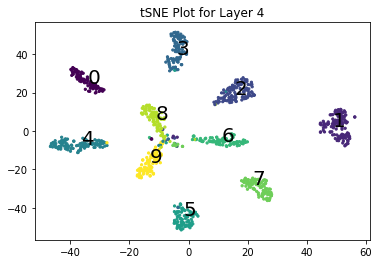

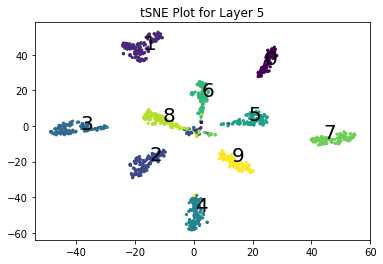

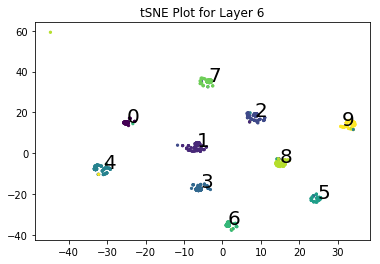

In [80]:
for i in range(len(images_HL_tsne)):
    coordinates = average(images_HL_tsne[i])
    plt.scatter(images_HL_tsne[i][:, 0], images_HL_tsne[i][:, 1], c = np.argmax(test_labels[:, ], axis = 1), s = 5)
    for j in range(10):
        plt.annotate(j,coordinates[j],fontsize = 20)
    plt.title("tSNE Plot for Layer {}".format(i + 1))
    plt.show()

As it can be observed from the series of graphs, with each layer passing the clusers seem to congragate to a more or less single cluster. With each layer the activation is becoming more significant and the clusters appear to self-converge in t-SNE but in PCA all the clusters appear to inter-converge.

The clusters more clearly visible using t-Stochastic Neighbor Embedding than Principal Component Analysis.